# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [5]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [7]:
books = pd.read_parquet("./goodreads/books.parquet")

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [9]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [33]:
interactions = pd.read_parquet("./goodreads/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [11]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


In [12]:
interactions['rating'].value_counts()

rating
4    4559434
5    3859840
3    2564629
0    1051672
2     671089
1     183770
Name: count, dtype: int64

In [13]:
interactions[interactions['is_read']].groupby('user_id')['rating']==0

False

In [14]:
average_unique_books_per_user = (
    interactions[interactions['is_read']]  # Фильтруем только прочитанные книги
    .groupby('user_id')['book_id'].nunique()  # Считаем уникальные книги для каждого пользователя
    .mean()  # Вычисляем среднее значение
)
print(f"Среднее количество уникальных прочитанных книг на пользователя: {average_unique_books_per_user:.2f}")

Среднее количество уникальных прочитанных книг на пользователя: 23.75


Пример данных по взаимодействиям

In [15]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [16]:
books.sample(3).T

,2342302,1187087,2298553
book_id,223838,815150,139987
author,Charles M. Sheldon,Karen Marie Moning,"Hans Christian Andersen, T. Pym"
title,In His Steps,"The Highlander's Touch (Highlander, #3)",The Snow Queen
description,A classic short Christian novel about the even...,A Warrior Of Immortal Powers\nHe was a mighty ...,Reprinted here for the first time since the 19...
genre_and_votes,"{'Christian': 240, 'Fiction': 178, 'Christian ...","{'Romance': 953, 'Science Fiction-Time Travel'...","{'Classics': 562, 'Fantasy': 417, 'Fiction': 2..."
num_pages,<NA>,356,96
average_rating,4.15,4.14,3.75
ratings_count,18639,22552,8088
text_reviews_count,358,711,508
publisher,,Dell Publishing Company,Everyman's Library


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [17]:
books["book_id"].nunique()

43312

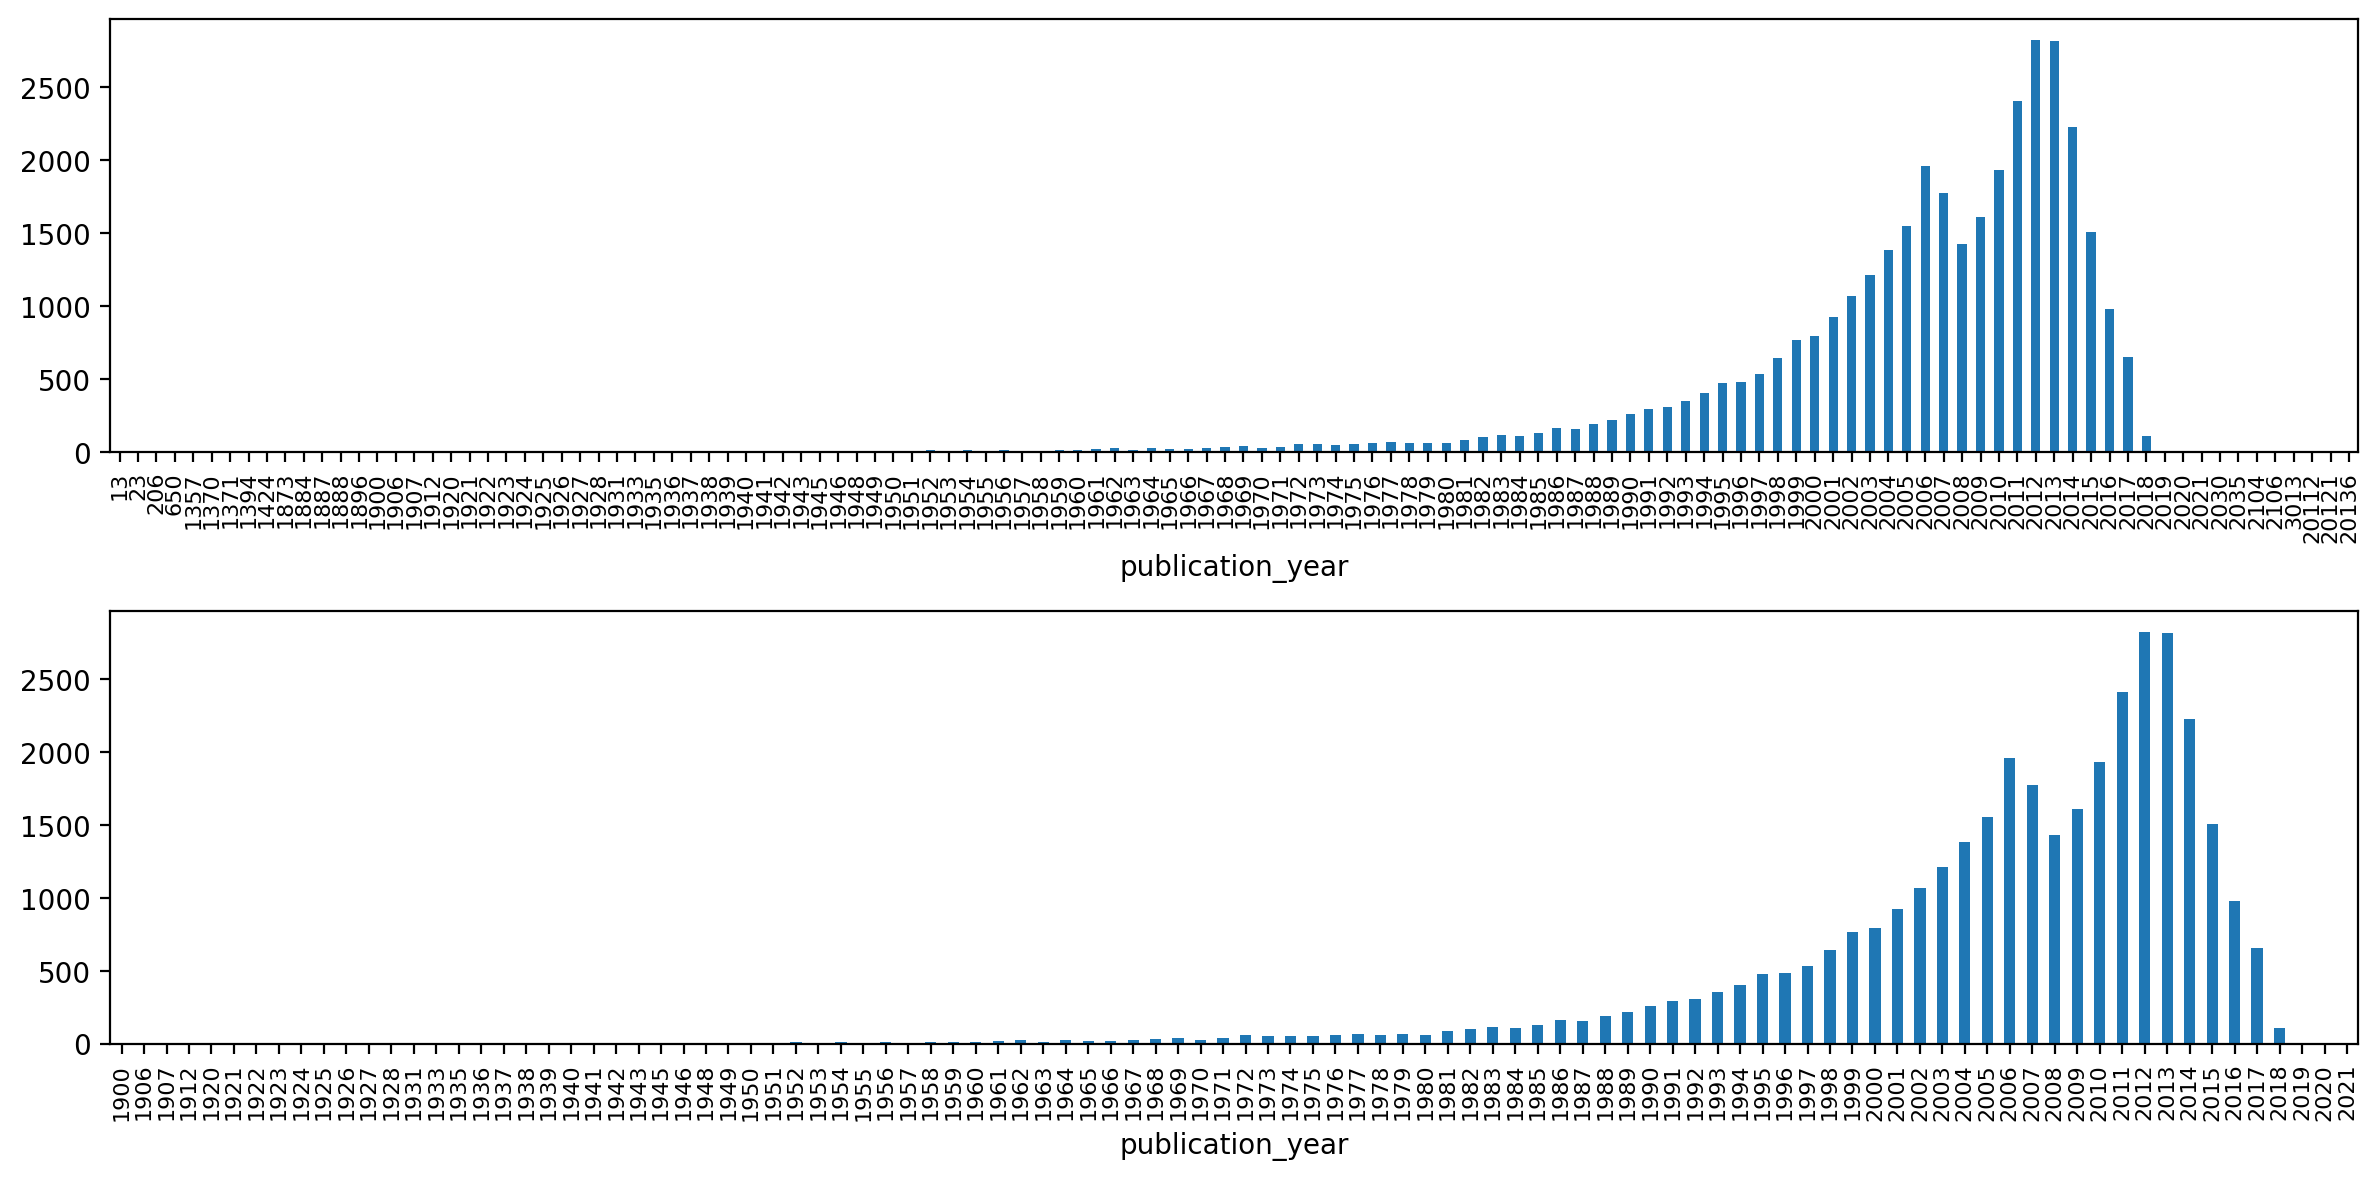

In [18]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [19]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [20]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [21]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


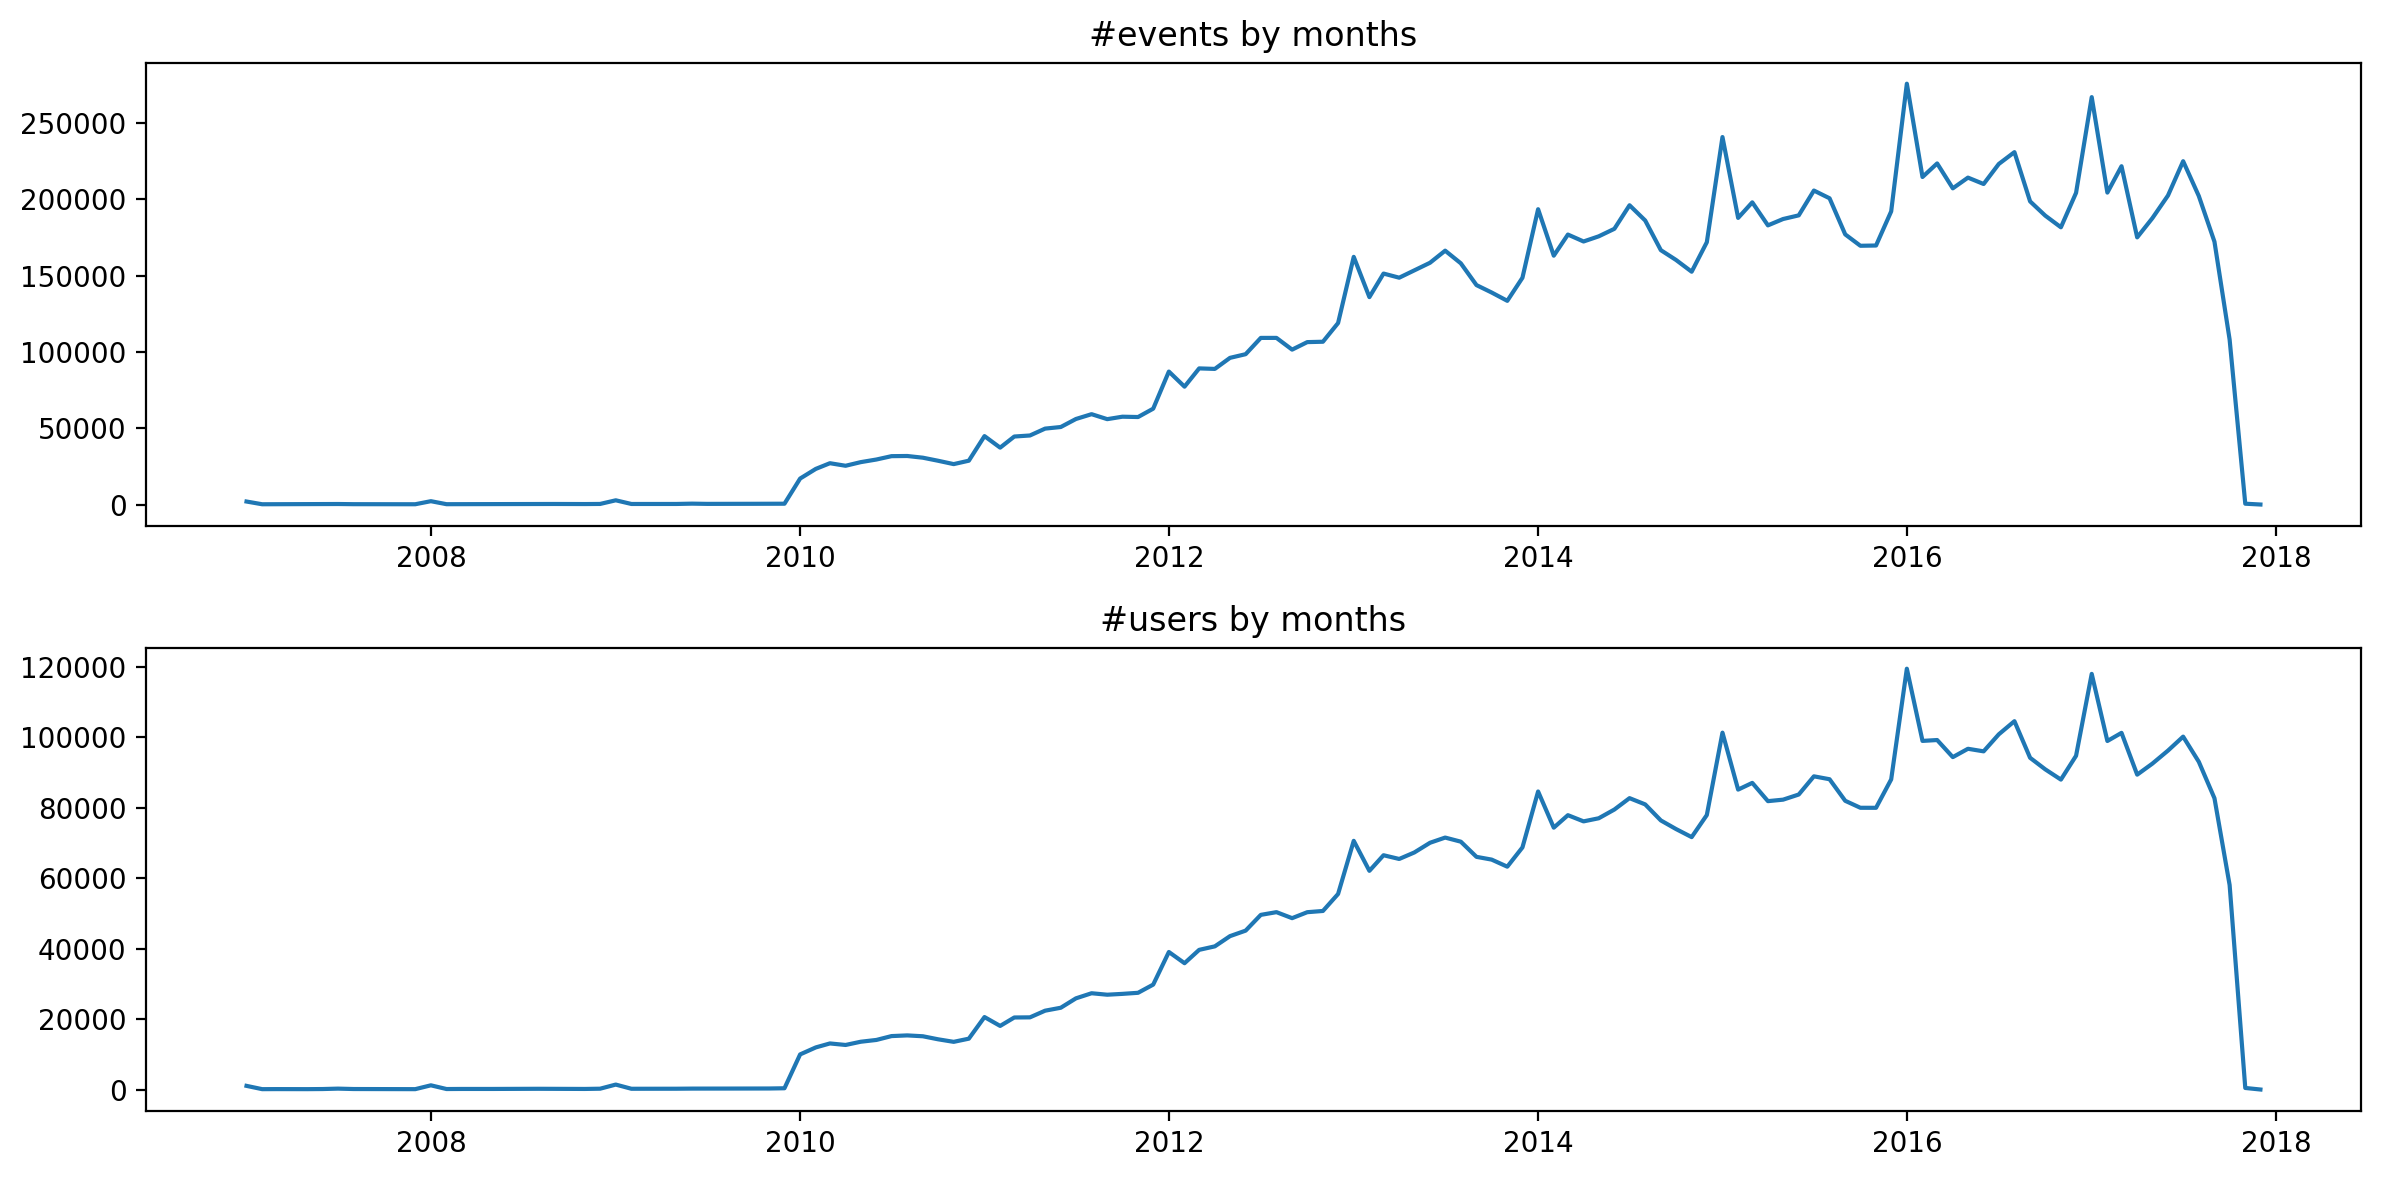

In [22]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

# Ваш код здесь

In [23]:
items = books.copy()
events = interactions.copy()

In [24]:
del books


In [25]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

In [26]:
events = events.dropna(subset=['rating'])  # если rating может быть NaN
# или, если rating = 0 означает отсутствие оценки:
events = events[events['rating'] > 0]

In [27]:
events = events[events['is_read'] == True]

In [28]:
# Группируем по user_id и считаем кол-во прочитанных книг
user_book_counts = events['user_id'].value_counts()  

# Оставляем только user_id с ≥ 2 книгами
valid_users = user_book_counts[user_book_counts >= 2].index  

# Фильтруем основной датафрейм
events = events[events['user_id'].isin(valid_users)]  

In [29]:
# Переименовываем датафреймы
items = items.rename(columns={"book_id": "item_id"})  
events = events.rename(columns={"book_id": "item_id"})  

In [30]:
# Получаем уникальные user_id, сортируем их и нумеруем с 1_000_000
unique_users = events['user_id'].unique()
unique_users_sorted = sorted(unique_users)  # Сортируем по возрастанию
user_id_mapping = {old_id: new_id for new_id, old_id in enumerate(unique_users_sorted, 1_000_000)}

events['user_id'] = events['user_id'].map(user_id_mapping)

In [31]:
# Сохраняем маппинг в DataFrame (опционально)
import pandas as pd
user_id_df = pd.DataFrame({
    'old_user_id': user_id_mapping.keys(),
    'new_user_id': user_id_mapping.values()
})
user_id_df.to_csv('user_id_mapping.csv', index=False)  # Можно использовать для обратного перевода

In [34]:
# кол-во оставшихся данных после преобразований
round((len(events) / len(interactions)),2)

0.91

In [35]:
# Какой новый идентификатор у пользователя с изначальным идентификатором 8f50136afeb65c55cec7b3d306c24b03?
# Если маппинг сохранён в переменной
old_id = "8f50136afeb65c55cec7b3d306c24b03"
new_id = user_id_mapping.get(old_id)
print(f"Новый идентификатор: {new_id}")

Новый идентификатор: 1241243


# Сохранение результатов

In [36]:
items.to_parquet('items.parquet', index=False)
events.to_parquet('events.parquet', index=False)